In [15]:
import pandas as pd
import matplotlib.pyplot as plt  # plot
import os
from os.path import join

path = ('/archive')
# file = (path + 'labels.csv')
# df = pd.read_csv(file)
# df.head()

In [2]:
# df.describe()

In [3]:
# df.hist

In [4]:
# df.info()

In [16]:
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Number of files in directory {link} is ", num_files)

In [17]:
countFile("archive/happy")
countFile("archive/sad")
countFile("archive/surprise")
countFile("archive/anger")
countFile("archive/disgust")
countFile("archive/fear")
countFile("archive/neutral")

Number of files in directory archive/happy is  5044
Number of files in directory archive/sad is  3091
Number of files in directory archive/surprise is  4039
Number of files in directory archive/anger is  3218
Number of files in directory archive/disgust is  2477
Number of files in directory archive/fear is  3176
Number of files in directory archive/neutral is  5126


In [18]:
file_counts

[5044, 3091, 4039, 3218, 2477, 3176, 5126]

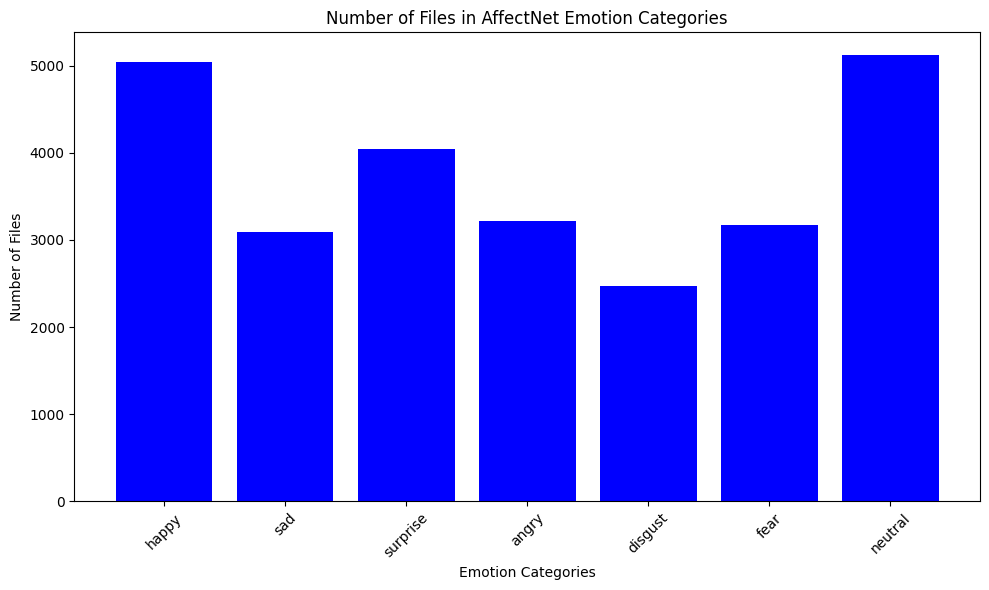

In [19]:
import matplotlib.pyplot as plt

# Data
categories = ['happy', 'sad', 'surprise', 'angry', 'disgust', 'fear', 'neutral']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, file_counts, color='blue')
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Files')
plt.title('Number of Files in AffectNet Emotion Categories')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# # display random images
# import random
# import cv2

# fig, axs = plt.subplots(2, 4, sharey=True, constrained_layout=True, num=None, 
#                         figsize=(5, 5), dpi=80, facecolor='gray', edgecolor='k')
# fig.suptitle("Sample Faces and Labels")
# axs = axs.flatten()

# for i in range(7):
#     idx = random.randint(0, len(df)-1)  # randomly select an index
#     img_path = path + df['pth'][idx]
#     img = cv2.imread(img_path)  # read image
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to BGR to RGB
#     axs[i].imshow(img)
#     axs[i].set_title(df['label'][idx])

In [21]:
# how many emotions categories

import os

INPUT_PATH = "archive"
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (96, 96)

print(EMOTIONS)

['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [22]:
# define functions to pre-process and load images into arrays

import cv2
import numpy as np
from keras.utils import to_categorical
import os

def image_generator(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, image_size)
            #img = img.astype('float32') / 255.0  # Normilize
            yield img, index

def load_images(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = to_categorical(np.array(y))
    return X, y

In [23]:
# Load the images
X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
input_shape = X[0].shape
#input_shape = (96,96,1) 

In [23]:
input_shape

(96, 96, 3)

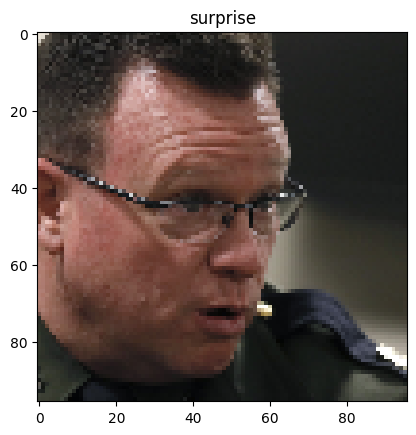

In [24]:
import matplotlib.pyplot as plt

# choose a random image index
idx = np.random.randint(len(X))

# display the image and its corresponding label from arrays
plt.imshow(X[idx])
plt.title(EMOTIONS[np.argmax(y[idx])])
plt.show()

In [25]:
# Train test split pre-processed data

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Model 1

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPool2D
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 94, 94, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 47, 47, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 batch_normalization_11 (Bat  (None, 45, 45, 64)      

In [27]:
y_test.shape

(5235, 7)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

history = model.fit(X_train, y_train, batch_size=128,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    
                    callbacks = [EarlyStopping(patience=10, monitor='val_loss', mode='min'), 
                                 ReduceLROnPlateau(monitor='val_loss', 
                                                   factor=0.5, 
                                                   patience=2, 
                                                   verbose=1),
                                 ModelCheckpoint('best_model.h5', 
                                                 save_best_only=True, 
                                                 save_weights_only=True, 
                                                 monitor='val_accuracy', 
                                                 mode='max')],
                    verbose=1)

Epoch 1/10
164/164 [==============================] - 333s 2s/step - loss: 3.7121 - accuracy: 0.3039 - val_loss: 2.6568 - val_accuracy: 0.3687 - lr: 0.0010
Epoch 2/10
164/164 [==============================] - 323s 2s/step - loss: 2.3168 - accuracy: 0.4316 - val_loss: 1.7526 - val_accuracy: 0.5259 - lr: 0.0010
Epoch 3/10
164/164 [==============================] - 317s 2s/step - loss: 1.6743 - accuracy: 0.5053 - val_loss: 1.3690 - val_accuracy: 0.5668 - lr: 0.0010
Epoch 4/10
164/164 [==============================] - 318s 2s/step - loss: 1.3568 - accuracy: 0.5511 - val_loss: 1.2004 - val_accuracy: 0.5868 - lr: 0.0010
Epoch 5/10
164/164 [==============================] - 311s 2s/step - loss: 1.1972 - accuracy: 0.5772 - val_loss: 1.0935 - val_accuracy: 0.6153 - lr: 0.0010
Epoch 6/10
164/164 [==============================] - 309s 2s/step - loss: 1.1123 - accuracy: 0.6009 - val_loss: 1.0711 - val_accuracy: 0.6166 - lr: 0.0010
Epoch 7/10
164/164 [==============================] - 440s 3s/st

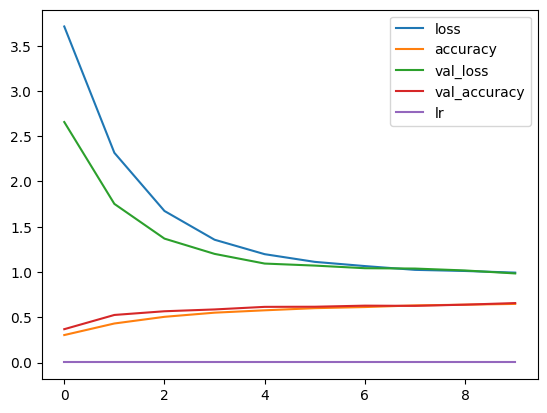

In [29]:
pd.DataFrame(history.history).plot();

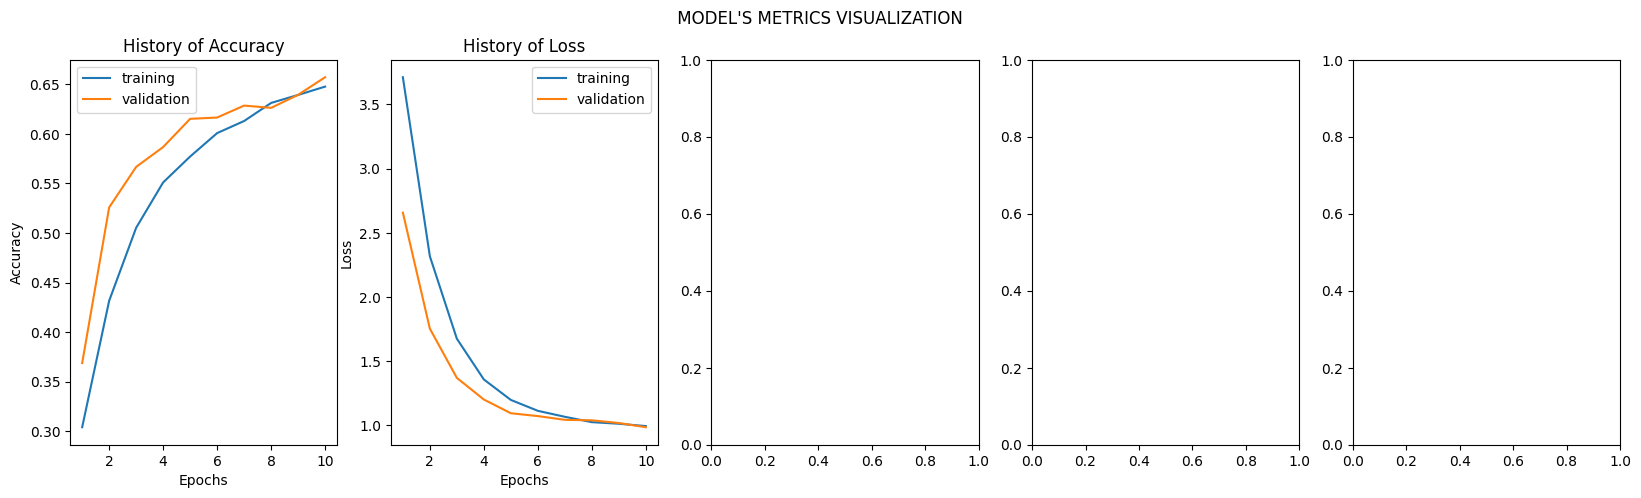

In [30]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    

    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
              )

164/164 [==============================] - 20s 119ms/step


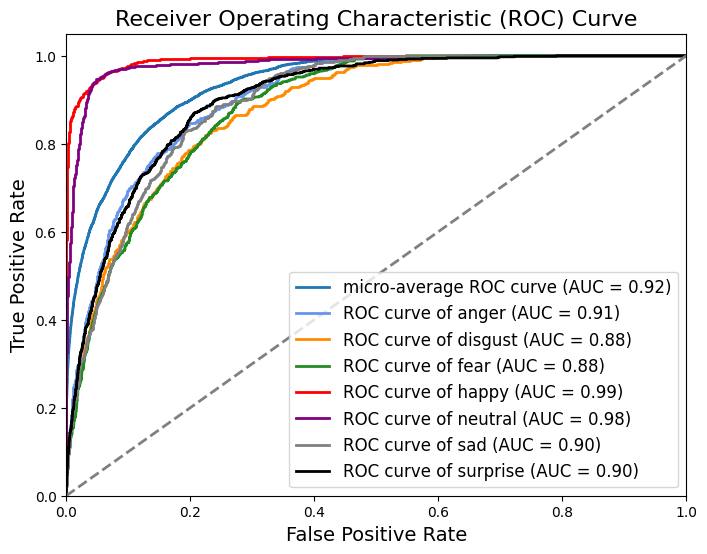

In [31]:
# calculates the false positive rate, true positive rate, and AUC score

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Plot the ROC curves for each class and the micro-average ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
                                                   ''.format(roc_auc["micro"]))
colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(EMOTIONS[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [32]:
# Compute classification report

from sklearn.metrics import classification_report

# Convert one-hot encoded y_test back to integers
y_test_int = np.argmax(y_test, axis=1)

# Make predictions
y_pred = model.predict(X_test)

# Convert one-hot encoded y_pred back to integers
y_pred_int = np.argmax(y_pred, axis=1)

# Generate classification report
print(classification_report(y_test_int, y_pred_int))

164/164 [==============================] - 19s 117ms/step
              precision    recall  f1-score   support

           0       0.58      0.48      0.52       640
           1       0.54      0.34      0.42       486
           2       0.45      0.49      0.46       661
           3       0.95      0.86      0.91       969
           4       0.85      0.92      0.89      1022
           5       0.50      0.51      0.51       643
           6       0.52      0.66      0.58       814

    accuracy                           0.66      5235
   macro avg       0.63      0.61      0.61      5235
weighted avg       0.66      0.66      0.65      5235



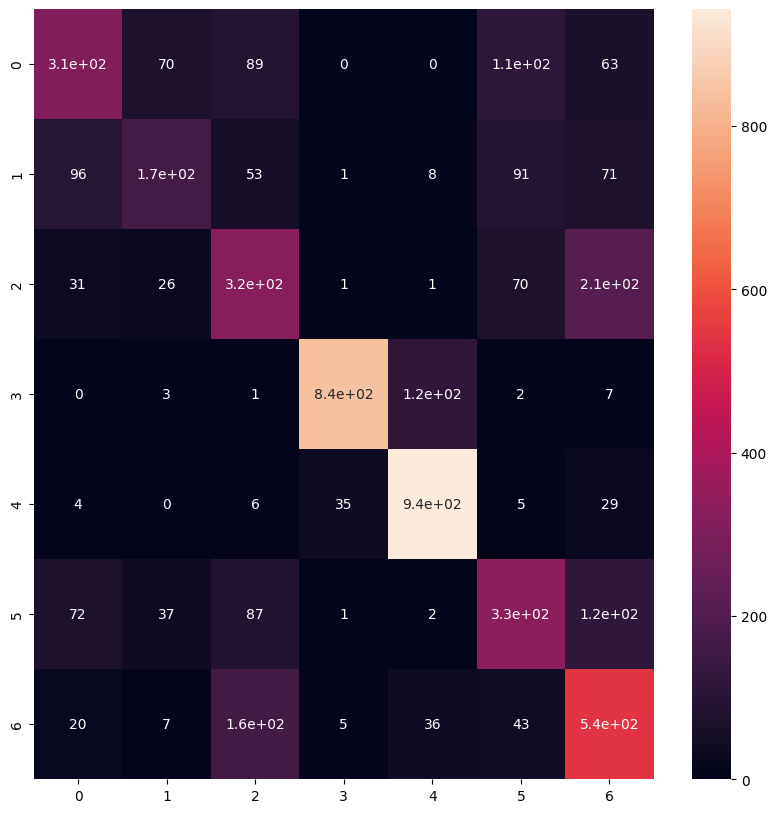

In [33]:
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test_int, y_pred_int)
sns.heatmap(cm, annot=True)
plt.show()

In [34]:
# save the model
model.save('/kaggle/working/model_4.h5')

## Model 2

In [1]:
from keras.models import Model
from keras.layers import Input, Conv2D, SeparableConv2D, BatchNormalization, MaxPool2D, Dropout, GlobalAveragePooling2D, Dense, Add
from keras.optimizers import Adam
import tensorflow as tf


model = tf.keras.Sequential([
    # Block 1
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),

    # Block 2
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),

    # Block 3
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),

    # Block 4
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),

    # Fully Connected Layers (Head part)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    # Output Layer
    tf.keras.layers.Dense(7, activation='softmax')  # 7 emotion classes
])

In [4]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",  # Correct loss function
    metrics=["accuracy"]
)
dataset_path = ""

In [5]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path + "archive",
    image_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    label_mode="categorical",
    shuffle=True
)
ds_valid = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path + "archive",
    image_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    label_mode="categorical",
    shuffle=False
)

Found 26171 files belonging to 7 classes.
Found 26171 files belonging to 7 classes.


In [8]:
model.fit(ds_train, validation_data=ds_valid, epochs=20, callbacks=[tf.keras.callbacks.EarlyStopping(min_delta=0.001, monitor="val_loss", restore_best_weights=True, patience=20)], verbose=1)

Epoch 1/20
818/818 [==============================] - 937s 1s/step - loss: 0.3447 - accuracy: 0.8774 - val_loss: 0.1692 - val_accuracy: 0.9400
Epoch 2/20
818/818 [==============================] - 887s 1s/step - loss: 0.3089 - accuracy: 0.8902 - val_loss: 0.1418 - val_accuracy: 0.9509
Epoch 3/20
818/818 [==============================] - 906s 1s/step - loss: 0.2767 - accuracy: 0.9038 - val_loss: 0.1067 - val_accuracy: 0.9659
Epoch 4/20
818/818 [==============================] - 945s 1s/step - loss: 0.2558 - accuracy: 0.9107 - val_loss: 0.1098 - val_accuracy: 0.9631
Epoch 5/20
818/818 [==============================] - 929s 1s/step - loss: 0.2376 - accuracy: 0.9152 - val_loss: 0.1029 - val_accuracy: 0.9657
Epoch 6/20
818/818 [==============================] - 880s 1s/step - loss: 0.2279 - accuracy: 0.9211 - val_loss: 0.0742 - val_accuracy: 0.9759
Epoch 7/20
818/818 [==============================] - 891s 1s/step - loss: 0.2053 - accuracy: 0.9282 - val_loss: 0.0709 - val_accuracy: 0.9781

In [9]:
scores = model.evaluate(ds_valid)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.save("my_model1.h5")
import tensorflow as tf

model = tf.keras.models.load_model("my_model1.h5")


818/818 [==============================] - 150s 183ms/step - loss: 0.0367 - accuracy: 0.9888
Accuracy: 98.88%


1/1 [==============================] - 0s 440ms/step


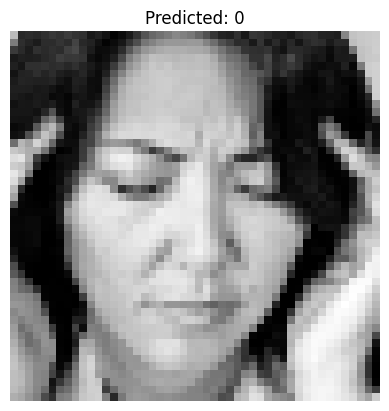

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("my_model1.h5")

for images, labels in ds_valid.take(1):
    idx = np.random.randint(0, images.shape[0])
    sample_image = images[idx].numpy()
    sample_label = labels[idx].numpy()
    break

sample_image_exp = np.expand_dims(sample_image, axis=0)

prediction = model.predict(sample_image_exp)

predicted_class = np.argmax(prediction, axis=1)[0]

plt.imshow(sample_image.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()


## Model3 - MobileNetV2

In [35]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False  # Freeze the base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)

model3 = Model(inputs=base_model.input, outputs=output)
model3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#model3.summary()

In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

history = model3.fit(X_train, y_train, batch_size=128,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    
                    callbacks = [EarlyStopping(patience=10, monitor='val_loss', mode='min'), 
                                 ReduceLROnPlateau(monitor='val_loss', 
                                                   factor=0.5, 
                                                   patience=2, 
                                                   verbose=1),
                                 ModelCheckpoint('best_model.h5', 
                                                 save_best_only=True, 
                                                 save_weights_only=True, 
                                                 monitor='val_accuracy', 
                                                 mode='max')],
                    verbose=1)

Epoch 1/10
164/164 [==============================] - 67s 395ms/step - loss: 2.0767 - accuracy: 0.2400 - val_loss: 1.7691 - val_accuracy: 0.2953 - lr: 0.0010
Epoch 2/10
164/164 [==============================] - 64s 394ms/step - loss: 1.7772 - accuracy: 0.2848 - val_loss: 1.7605 - val_accuracy: 0.2745 - lr: 0.0010
Epoch 3/10
164/164 [==============================] - 63s 383ms/step - loss: 1.6958 - accuracy: 0.3101 - val_loss: 1.6525 - val_accuracy: 0.3171 - lr: 0.0010
Epoch 4/10
164/164 [==============================] - 64s 390ms/step - loss: 1.6540 - accuracy: 0.3231 - val_loss: 1.7763 - val_accuracy: 0.2844 - lr: 0.0010
Epoch 5/10
164/164 [==============================] - 66s 405ms/step - loss: 1.6350 - accuracy: 0.3347 - val_loss: 1.6343 - val_accuracy: 0.3341 - lr: 0.0010
Epoch 6/10
164/164 [==============================] - 64s 389ms/step - loss: 1.6207 - accuracy: 0.3403 - val_loss: 1.6341 - val_accuracy: 0.3368 - lr: 0.0010
Epoch 7/10
164/164 [==============================] 

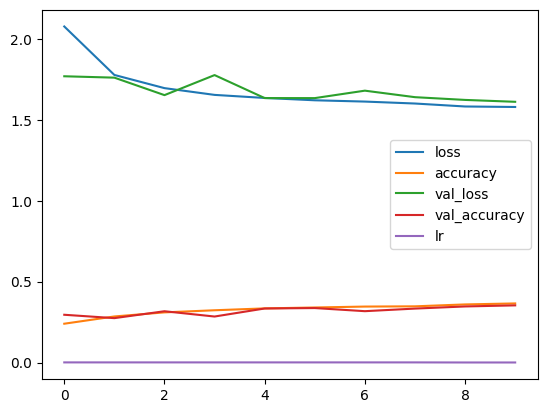

In [37]:
pd.DataFrame(history.history).plot();

164/164 [==============================] - 16s 94ms/step


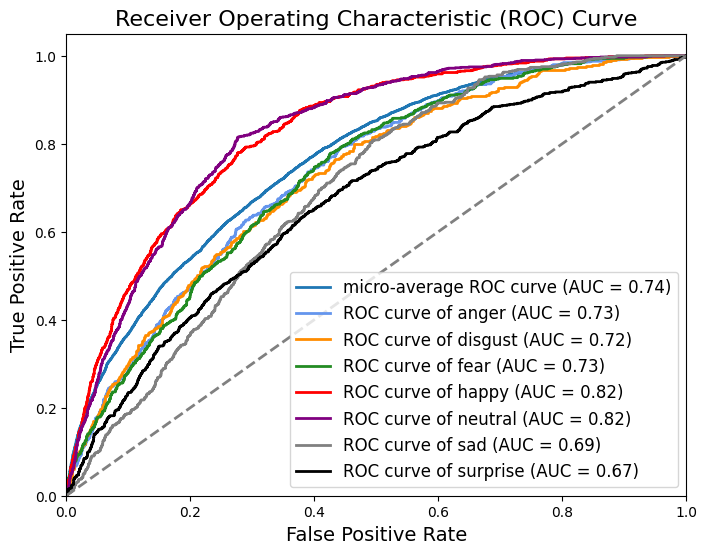

In [40]:
# calculates the false positive rate, true positive rate, and AUC score

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model3.predict(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Plot the ROC curves for each class and the micro-average ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
                                                   ''.format(roc_auc["micro"]))
colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(EMOTIONS[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [41]:
# Compute classification report

from sklearn.metrics import classification_report

# Convert one-hot encoded y_test back to integers
y_test_int = np.argmax(y_test, axis=1)

# Make predictions
y_pred = model3.predict(X_test)

# Convert one-hot encoded y_pred back to integers
y_pred_int = np.argmax(y_pred, axis=1)

# Generate classification report
print(classification_report(y_test_int, y_pred_int))

164/164 [==============================] - 15s 89ms/step
              precision    recall  f1-score   support

           0       0.27      0.38      0.32       640
           1       0.27      0.06      0.10       486
           2       0.30      0.22      0.25       661
           3       0.45      0.56      0.50       969
           4       0.46      0.53      0.49      1022
           5       0.24      0.05      0.08       643
           6       0.26      0.39      0.31       814

    accuracy                           0.35      5235
   macro avg       0.32      0.31      0.29      5235
weighted avg       0.34      0.35      0.33      5235

